In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True
                               )

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f001a985c88>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f001a985518>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f001a985860>)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [8]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [0]:
#this is a multiclass classification problem

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

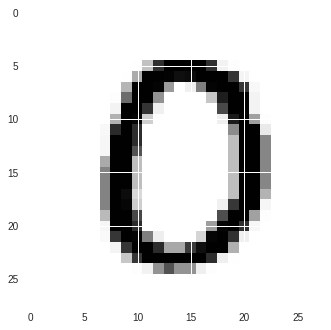

In [12]:
first_image=mnist.train.images[10]
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show

In [0]:
#forward propagation
#there are 784 columns so first layer (input) will have 784 parameters
# we choose out hidden layers to have 256 parameters each
#we want two hidden layers
#so basically no. of weights required for 1->2 are 784*256 and 256 biases
#2->3 are 256*256 weights and 256 biases
# output has 10 labels so 3-> output requires 256*10 weights and 10 biases

In [0]:
n_input=784
n_hidden1=256
n_hidden2=256
n_classes=10


In [15]:
#define weights and biases in the form of a dictionary
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
    
}

biases={
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
    
}


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def fwd_prop(x,weights,biases):
  in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
  out_layer1=tf.nn.relu(in_layer1)
  
  in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
  out_layer2=tf.nn.relu(in_layer2)
  
  in_layer3=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
  output=tf.nn.relu(in_layer3)
  
  return output
  
  
  
  

In [49]:
x=tf.placeholder("float",[None,n_input])
y=tf.placeholder("int32",[None,n_classes])

pred=fwd_prop(x,weights,biases)

predictions=tf.argmax(pred,1)# 1 is the axis in which maximum has to be found #to get index with max value
true_labels=tf.argmax(y,1)
sess=tf.Session()
sess.run(tf.global_variables_initializer())



#to find correct ones:
correct_predictions=tf.equal(predictions,true_labels)
predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([5, 2, 2, ..., 2, 9, 2]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False,  True, False, ..., False, False, False]))

In [36]:
correct_pred.sum()

1224

In [52]:
#find cost 
#use cross entropy cost
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
c,_=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
c

854.95026